Importing dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Reading the csv file using pandas dataframe and perform exploratory data analysis

In [2]:
customer_data = pd.read_csv('customer-churn.csv')
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# checking for the dimension of the dataset

customer_data.shape

(7043, 21)

In [4]:
# checking for any null values

customer_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# Extracting some basic information about the dataset

customer_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Changing the data type pf TotalCharges column from object to numeric
# errors = 'coerce' directs the code to ignore the errors if it occurs during conversion
pd.to_numeric(customer_data.TotalCharges, errors = 'coerce')


0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [8]:
customer_data[pd.to_numeric(customer_data.TotalCharges, errors = 'coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
# Droping the customerID column

customer_data.drop(['customerID'], axis = 1, inplace = True)

In [10]:
customer_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# Remove rows with space in TotalCharges column

new_customer_data = customer_data[customer_data.TotalCharges!=' ']

In [12]:
new_customer_data = pd.to_numeric(new_customer_data.TotalCharges)

In [13]:
# Checking if the conversion took place or not

new_customer_data.shape

(7032,)

In [14]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [15]:
customer_data.shape

(7043, 20)

Pandas will recognise a value as null if it is a np.nan object, which will print as NaN in the DataFrame. Your missing values are probably empty strings, which Pandas doesn't recognise as null. To fix this, you can convert the empty stings (or whatever is in your empty cells) to np.nan objects using replace(), and then call dropna()on your DataFrame to delete rows with null values.

In [16]:
# Replacing the empty strings in the TotalCharges column with np.nan objects

customer_data['TotalCharges'].replace(' ', np.nan, inplace=True)

In [17]:
customer_data['TotalCharges'].isnull().sum()

11

In [18]:
customer_data.dropna(subset=['TotalCharges'], inplace=True)

In [19]:
customer_data.shape

(7032, 20)

In [20]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [21]:
updated_customer_data = customer_data.copy()
updated_customer_data['TotalCharges'] = pd.to_numeric(updated_customer_data['TotalCharges'])
updated_customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


Data Visualization to show tenure vs Churn

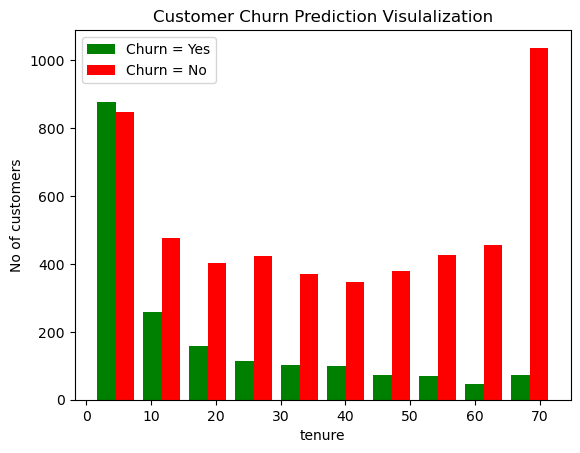

In [22]:
tenure_churn_no = updated_customer_data[updated_customer_data.Churn == 'No'].tenure
tenure_churn_yes = updated_customer_data[updated_customer_data.Churn == 'Yes'].tenure
plt.xlabel('tenure')
plt.ylabel('No of customers')
plt.title('Customer Churn Prediction Visulalization')

plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green', 'red'], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

We can see that the custome who has been with the companmy for long time has low churning rate.

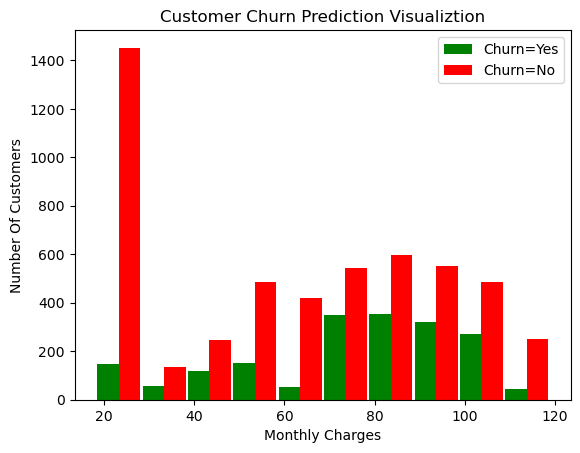

In [23]:
mc_churn_no = updated_customer_data[updated_customer_data.Churn=='No'].MonthlyCharges      
mc_churn_yes = updated_customer_data[updated_customer_data.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

While increasing the monthly charges, the number of customer churning is also increasing slightly.

In [24]:
updated_customer_data.replace('No internet service', 'No', inplace=True)
updated_customer_data.replace('No phone service', 'No', inplace=True)

In [25]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [26]:
print_unique_col_values(updated_customer_data)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Encoding Yes and No to 1 and 0 respectively

In [27]:
columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for column in columns:
    updated_customer_data[column].replace({'Yes':1, 'No': 0}, inplace=True)


In [28]:
print_unique_col_values(updated_customer_data)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [29]:
for column in updated_customer_data:
    print (f'{column}: {updated_customer_data[column].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [30]:
# replacing male with 0 and female with 1 in the gender column
# we can supply dictionary in the replace function

updated_customer_data['gender'].replace({'Female':1, 'Male': 0}, inplace=True)

In [31]:
updated_customer_data.gender.unique()

array([1, 0], dtype=int64)

Using one hot encoding for categorical columns

In [32]:
newly_updated_customer_data =  pd.get_dummies(data= updated_customer_data, columns=['InternetService','Contract','PaymentMethod'])
newly_updated_customer_data.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [33]:
newly_updated_customer_data.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2457,0,1,1,0,57,1,0,0,1,1,...,0,1,0,0,1,0,0,0,1,0
5896,0,1,1,0,71,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4037,1,0,1,1,59,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [34]:
newly_updated_customer_data.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

Now every data type of column is non strings

In [35]:
# scaling the columns so that the values lie between 0 and 1
# min max scaler
# importing the min max scaler dependency from sklearn

columns_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

newly_updated_customer_data[columns_to_scale] = scaler.fit_transform(newly_updated_customer_data[columns_to_scale])

In [36]:
for col in newly_updated_customer_data:
    print(f'{col}: {newly_updated_customer_data[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [37]:
newly_updated_customer_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


Splitting the columns into features and target

In [38]:
x = newly_updated_customer_data.drop('Churn', axis= 1)
y = newly_updated_customer_data['Churn']

Train test split

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [40]:
X_train.shape

(5625, 26)

In [41]:
len(X_train.columns)

26

Importing keras dependencies

In [46]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
            keras.layers.Dense(22, input_shape = (26,), activation = 'relu'),
             # 1 input layer, 1 hidden layer (26 neurons), 1 output layer(1 neuron)
            keras.layers.Dense(26, input_shape = (26,), activation = 'relu'),
            keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
            loss = 'binary_crossentropy',
            metrics = ['accuracy'])

In [47]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
5625/5625 [==============================] - 1s 90us/sample - loss: 0.4849 - acc: 0.7623
Epoch 2/50
5625/5625 [==============================] - 0s 77us/sample - loss: 0.4309 - acc: 0.7931
Epoch 3/50
5625/5625 [==============================] - 0s 56us/sample - loss: 0.4239 - acc: 0.8002
Epoch 4/50
5625/5625 [==============================] - 0s 56us/sample - loss: 0.4209 - acc: 0.7991
Epoch 5/50
5625/5625 [==============================] - 0s 56us/sample - loss: 0.4177 - acc: 0.8009
Epoch 6/50
5625/5625 [==============================] - 0s 61us/sample - loss: 0.4162 - acc: 0.8007
Epoch 7/50
5625/5625 [==============================] - 0s 56us/sample - loss: 0.4130 - acc: 0.8048
Epoch 8/50
5625/5625 [==============================] - 0s 65us/sample - loss: 0.4121 - acc: 0.8046
Epoch 9/50
5625/5625 [==============================] - 0s 60us/sample - loss: 0.4117 - acc: 0.8066
Epoch 10/50
5625/5625 [==============================] - 0s 61us/sample - loss: 0.4091 - acc: 0.8025

Model evaluation on test data

In [48]:
model.evaluate(X_test, y_test)

1407/1407 [==============================] - 0s 121us/sample - loss: 0.4286 - acc: 0.7925


[0.42863498885494306, 0.7924662]

In [49]:
y_prediction = model.predict(X_test)
y_prediction[:5]

array([[0.01299319],
       [0.82231516],
       [0.31613386],
       [0.54486185],
       [0.4218664 ]], dtype=float32)

In [50]:
# shape of y predict

y_prediction.shape

(1407, 1)

In [51]:
# Converting the values of y predict to 0 and 1
# threshold = 0.5

y_pred = []

for ele in y_prediction:
    if ele > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        

In [52]:
y_pred[:10]

[0, 1, 0, 1, 0, 0, 0, 0, 1, 0]

In [53]:
y_test[:10]

5580    0
3438    1
2175    1
4237    1
511     0
6769    0
5597    1
3468    0
4482    1
661     0
Name: Churn, dtype: int64

Classification report

In [54]:
from sklearn.metrics import confusion_matrix, classification_report

print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1051
           1       0.61      0.50      0.55       356

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.79      1407



Text(95.72222222222221, 0.5, 'Actual')

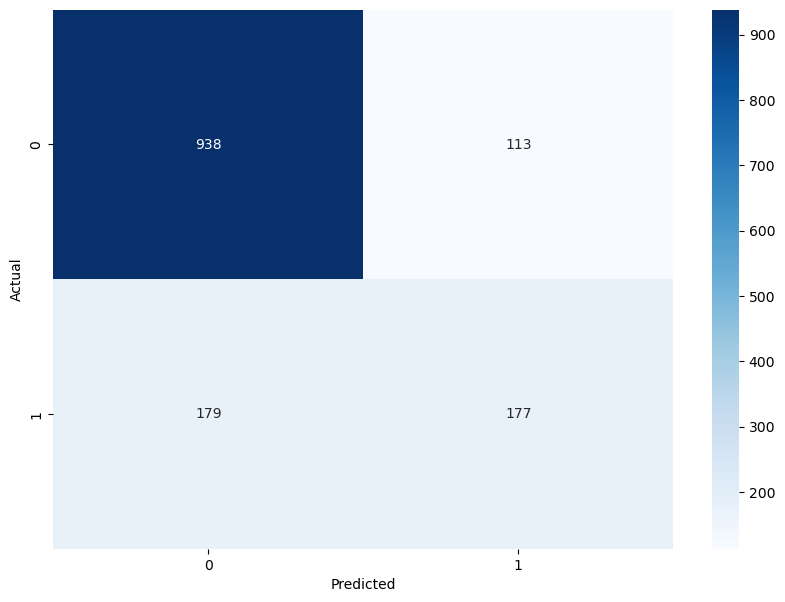

In [59]:
# Visualizing confusion matrix

import seaborn as sns

cf_matrix = confusion_matrix(y_test, y_pred)
# cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cf_matrix, annot=True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Accuracy:

In [60]:
round((938 + 177)/(938 + 113 + 179+ 177), 2)

0.79

Precision for class 0. i.e. Precision for customers who did not churn

In [61]:
round(/(938 + 179),2)

0.84

Precision for class 1. i.e. Precision for customer who churned

In [62]:
round(177/(177 + 113),2)

0.61

Recall for class 0

In [63]:
round(938/(938 + 113),2)

0.89

Recall for class 1

In [64]:
round(177/(177 + 179),2)

0.5